* **Dosya düzeni**: "ISIC" adında bir klasör açtık. Onun içine indirdiğimiz tüm klasörleri koyduk. İndirdiğimiz klasörlerin adlarını *ISIC_2019_Training_Input -> images*, *ISIC_2019_Training_Metadata -> additional_info*, *ISIC_2019_Training_GroundTruth -> labels* olarak değiştirdik. Bundan sonraki klasör düzenleme işlemlerini kod ile yaptık.

#### 1. Train, validation ve test setimizi oluşturuyoruz.

Aşağıdaki gibi her türün kendine ait bir klasörü olsun istiyoruz. Bu düzen train, validation ve test setlerinin hepsi için geçerli olacak. 

Bu düzeni sağladığımızda image data generator kullanabilir olacağız kendi datamızı yükleyebilmek için. [18. TensorFlow Tutorial 18 - Custom Dataset for Images](https://github.com/eliffkkurt/MyRoadmap/blob/main/TensorFlow/18.%20TensorFlow%20Tutorial%2018%20-%20Custom%20Dataset%20for%20Images.ipynb) notebookunda görmüştük. 

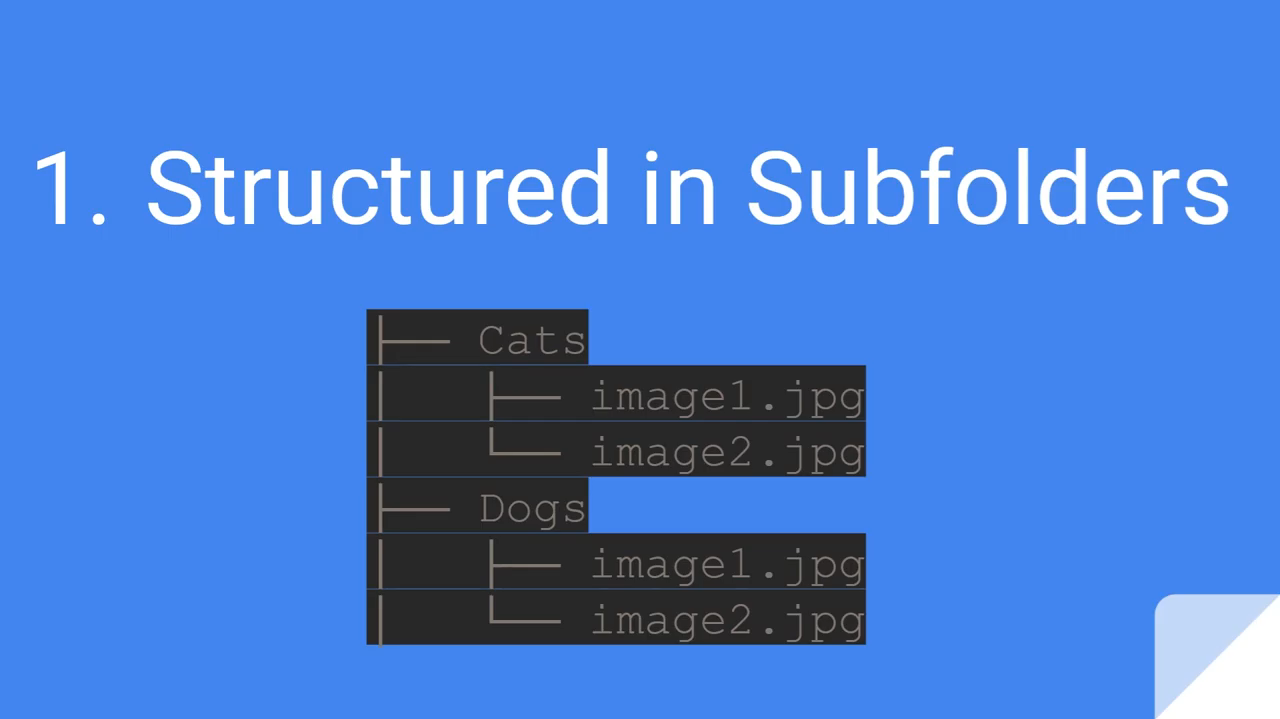

In [1]:
import os
import shutil
import random

In [4]:
seed = 1 # scripti birden çok kez çalıştırırsak, tam olarak aynı bölünmeyi elde edelim diye yazdık.
random.seed(seed)
directory = "ISIC/images/" # resimlerin yerini belirtiyoruz.
train = "data/train/"
validation = "data/validation/"
test = "data/test/"

ISIC/images datasetini manuel olarak açmıştık. Gerisini aşağıdaki kodlarla açıyoruz. 

In [5]:
os.makedirs(train + "benign/")
os.makedirs(train + "malignant/")
os.makedirs(validation + "benign/")
os.makedirs(validation + "malignant/")
os.makedirs(test + "benign/")
os.makedirs(test + "malignant/")

#### 2. Her bir klasöre kaç resim koyacağımızı ayarlıyoruz ve resimleri bu sayıya göre başka klasörlere kopyalıyoruz.

In [7]:
# Hepsini 0 olarak initialize ediyoruz önce.
train_examples = validation_examples = test_examples = 0

In [8]:
for line in open("ISIC/labels.csv").readlines()[1:]: # ilk satır column adları belirttiği için onu almadık
    split_line = line.split(",") # csv dosyası olduğu için virgülle ayrılıyor sütunlar
    img_file = split_line[0] # image dosyasının adı
    benign_malign = split_line[1] # benign mi malign mi olduğu bilgisi, benign: 0, malign: 1
    
    # %80 train, %10 validation, %10 test set olarak ayıracağız.
    random_num = random.random() # uniform random number between 0 and 1
    
    if random_num < 0.8:
        location = train # train = "data/train/" idi.
        train_examples +=1  
        
    elif random_num < 0.9: # between 0.8 and 0.9
        location = validation # validation = "data/validation/"
        validation_examples +=1
        
    else:
        location = test # test = "data/test/"
        test_examples +=1
        
    if int(float(benign_malign)) == 0: # bu değer dosyada 0.0 ve 1.0 olarak geçiyor bu yüzden integera çeviriyoruz.
        shutil.copy(
            "ISIC/images/"+ img_file + ".jpg",  # buradan
            location + "benign/" + img_file + ".jpg" # buraya kopyalıyoruz
        )
        
    elif int(float(benign_malign)) == 1:
         shutil.copy(
            "ISIC/images/"+ img_file + ".jpg",  # buradan
            location + "malignant/" + img_file + ".jpg" # buraya kopyalıyoruz
        )

print(f"Number of training examples {train_examples}")
print(f"Number of validation examples {validation_examples}")
print(f"Number of test examples {test_examples}")

Number of training examples 20224
Number of validation examples 2552
Number of test examples 2555


Herhangi bir hata olması durumuna karşın dosyaları taşımayacağız sadece kopyalayacağız. Bunu da `shutil.copy()` ile sağlıyoruz. 

*train_isic.py dosyası üzerinden devam ediyoruz...*